# Implementing Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housingData = pd.read_csv('data.csv')

np.random.seed(0)
housingData.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
x=housingData.statezip[0]
x
len(x)

8

In [4]:
housingData.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


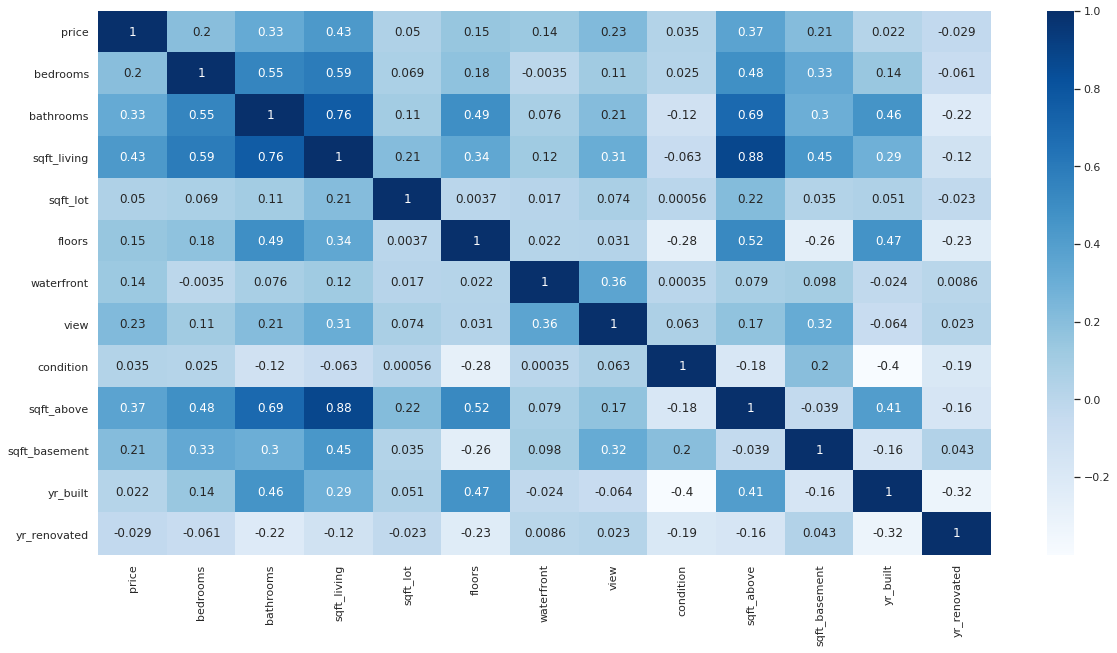

In [5]:
sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(housingData.corr(),annot=True,cmap='Blues')
plt.show()

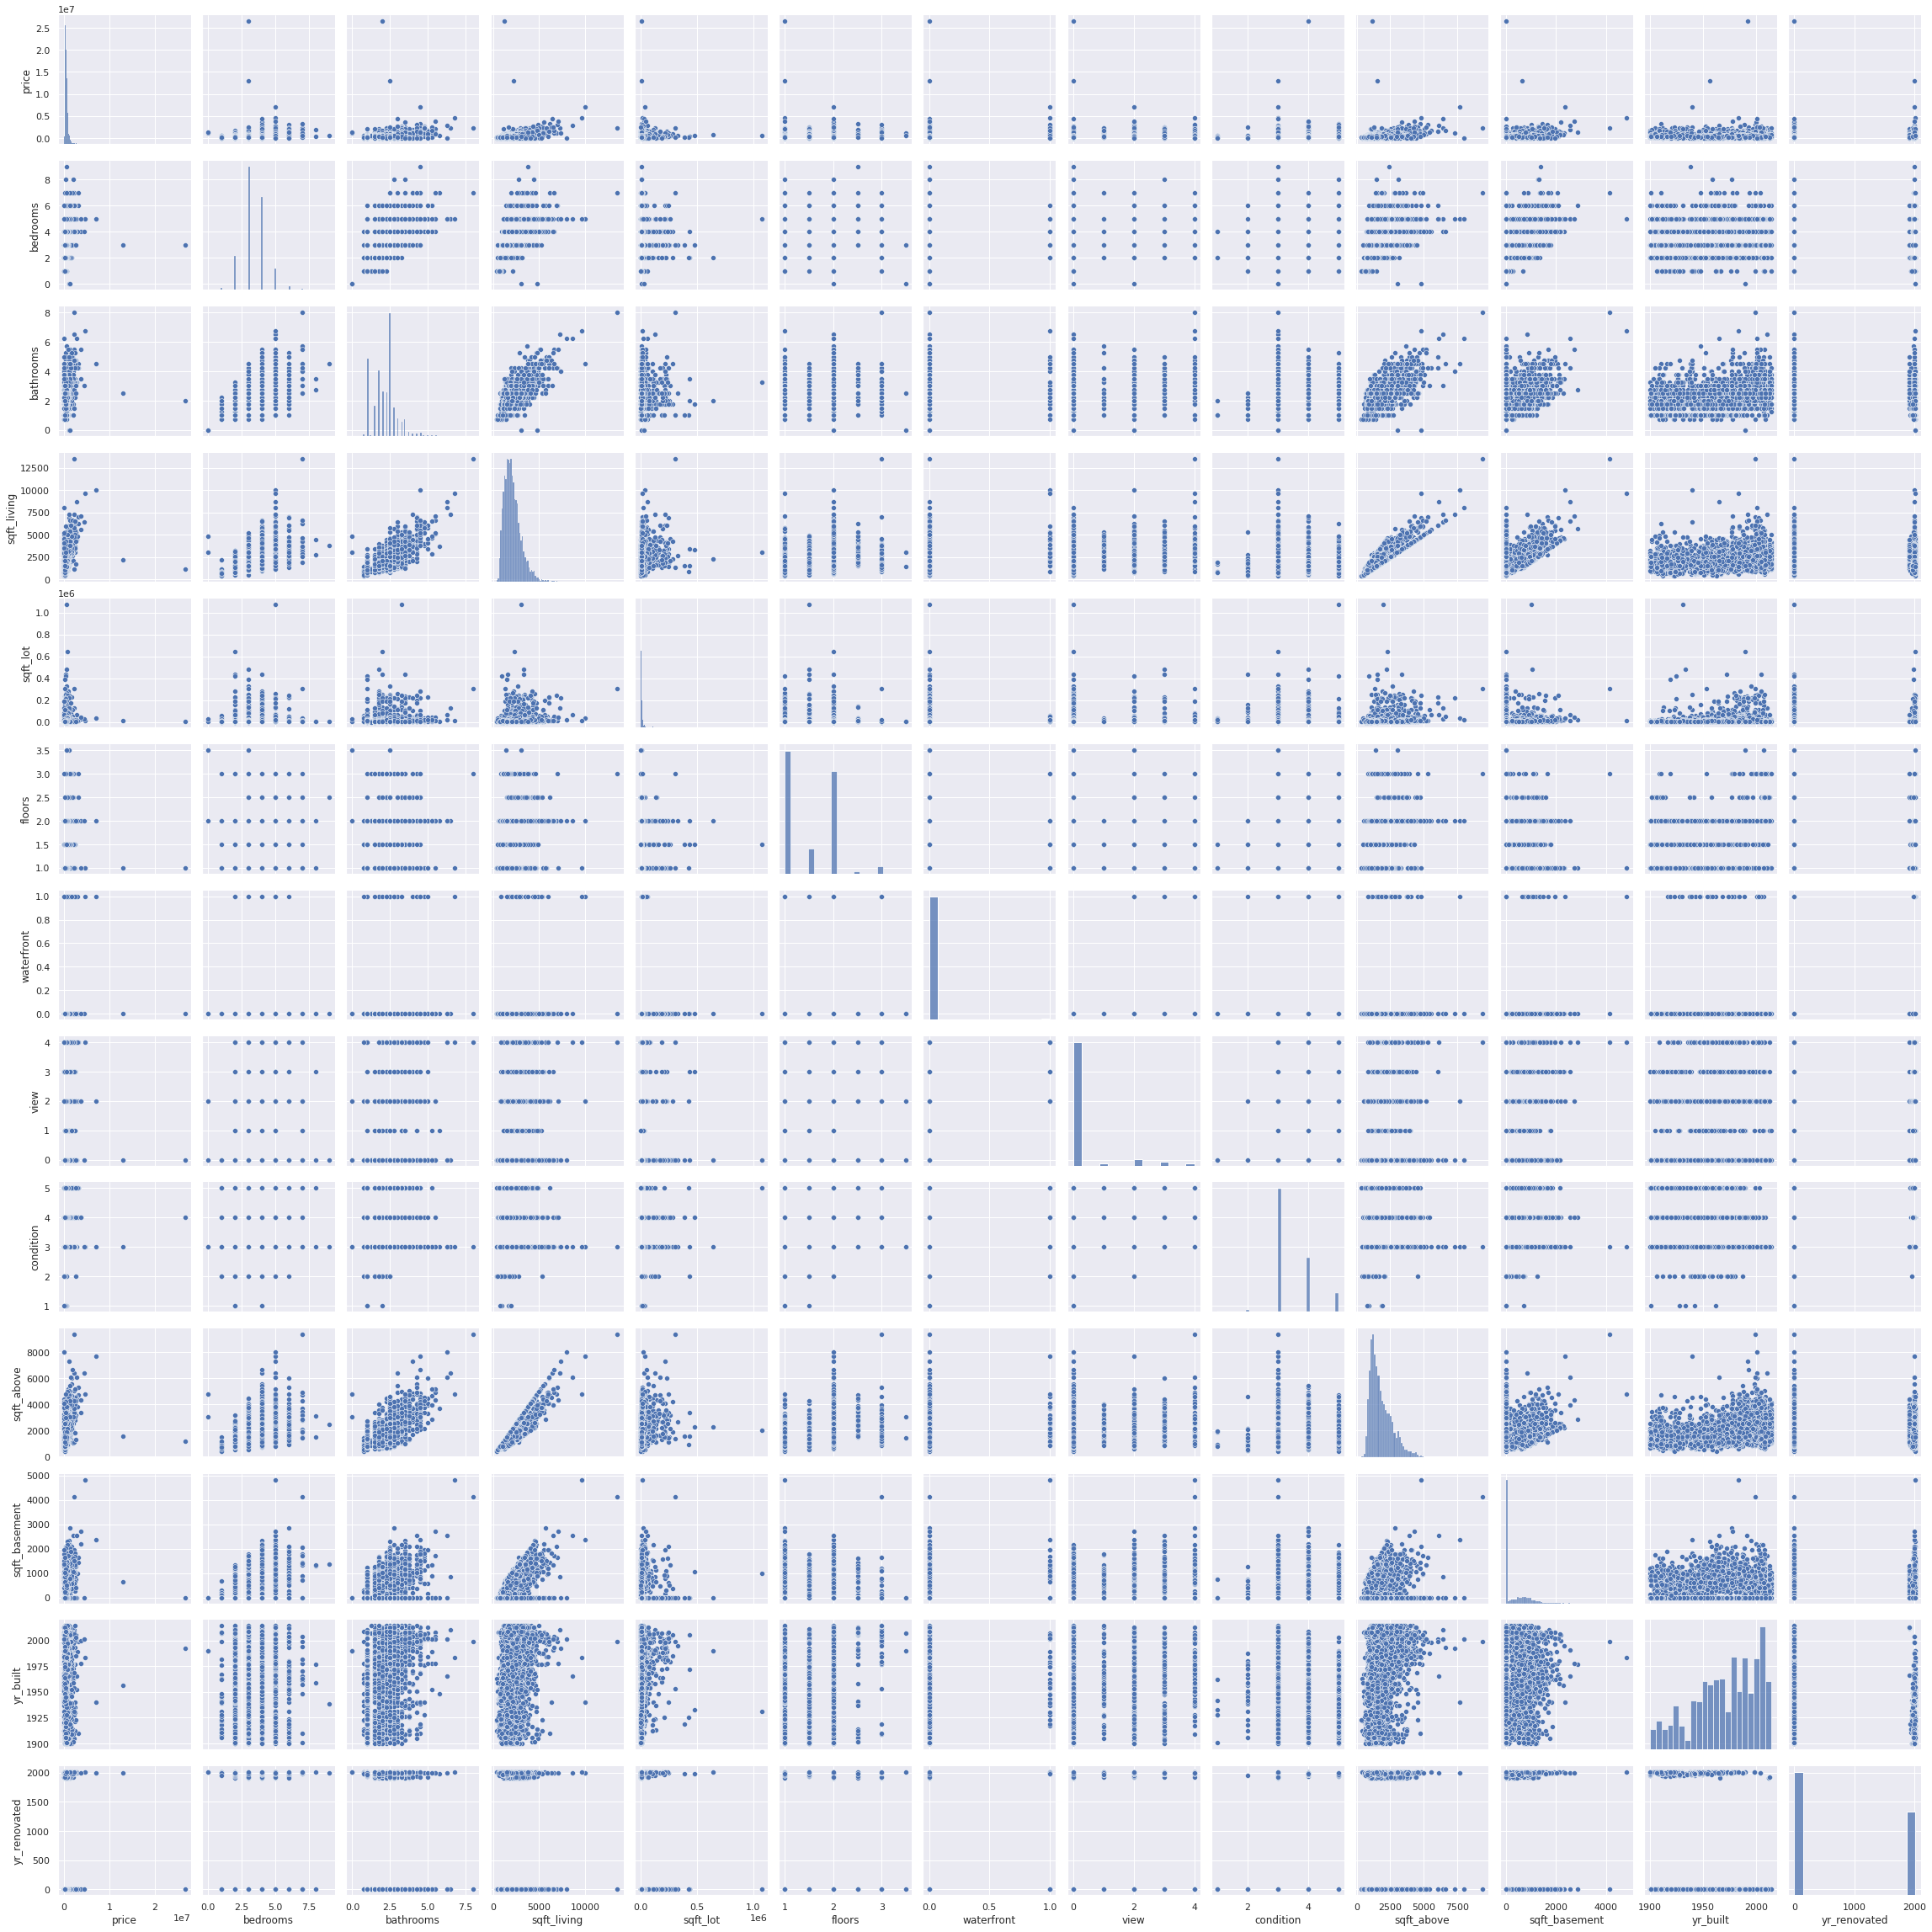

In [6]:
sns.pairplot(housingData)
plt.show()

Text(0.5, 1.0, 'Bedroom vs Price')

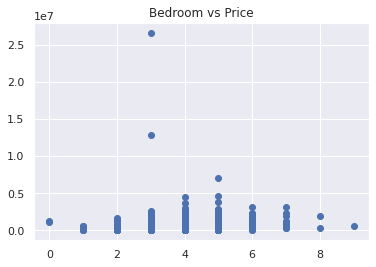

In [7]:
x= housingData['bedrooms']
y = housingData['price']
plt.scatter(x,y)
plt.title('Bedroom vs Price')

## Linear Regression Using Single Feature.

In [8]:
y = housingData[['price']]
x = housingData[['sqft_living']]


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.03,random_state =2)

In [24]:
regressionOne = LinearRegression()
regressionOne.fit(x_train,y_train)

LinearRegression()

Coefficients: 
 [[252.38270506]]
Score on test data: 0.5811316898642187
Score on training data: 0.1816762054771871


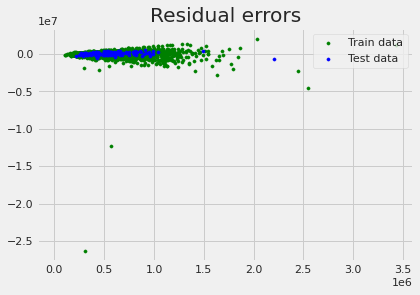

In [25]:
print('Coefficients: \n', regressionOne.coef_)
print('Score on test data: {}'.format(regressionOne.score(x_test, y_test)))
print('Score on training data: {}'.format(regressionOne.score(x_train, y_train)))
plt.style.use('fivethirtyeight')
plt.scatter(regressionOne.predict(x_train), regressionOne.predict(x_train) - y_train,
   color = "green", s = 10, label = 'Train data')
plt.scatter(regressionOne.predict(x_test), regressionOne.predict(x_test) - y_test,
   color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 10)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [14]:
#Prediciting the values

y_pred = regressionOne.predict(x_test)  
x_pred = regressionOne.predict(x_train)

In [15]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 180296.7670291751
Mean Squared Error: 72698006969.48242
Root Mean Squared Error: 269625.67935840687
Variance score: 0.40


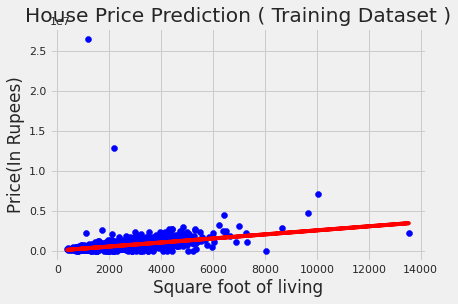

In [16]:
#Ploting the best line of Training data

plt.scatter(x_train, y_train, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("House Price Prediction ( Training Dataset )")  
plt.xlabel("Square foot of living")  
plt.ylabel("Price(In Rupees)")  
plt.show()

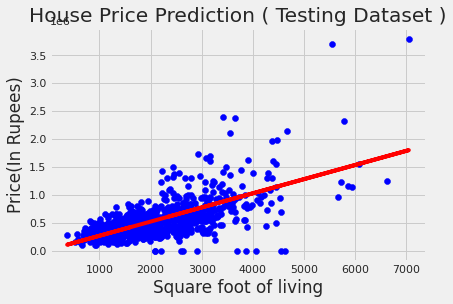

In [17]:
#Ploting the best line of Testing data

plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_test, y_pred, color="red")    
plt.title("House Price Prediction ( Testing Dataset )")  
plt.xlabel("Square foot of living")  
plt.ylabel("Price(In Rupees)")  
plt.show()

## Linear Regression With Multiple Feature.

In [18]:
labels = housingData['price']
conv_dates = [1 if values == 2014 else 0 for values in housingData.date ]
conv_zip=[]
for value in housingData.statezip:
    conv_zip.append(value[3:])
    
housingData['date'] = conv_dates
housingData['statezip'] = conv_zip
train1 = housingData.drop(['price','street','city','country'],axis=1)

In [27]:
train1.statezip

0       98133
1       98119
2       98042
3       98008
4       98052
        ...  
4595    98133
4596    98007
4597    98059
4598    98178
4599    98042
Name: statezip, Length: 4600, dtype: object

In [28]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [29]:
regressionTwo = LinearRegression()

In [30]:
regressionTwo.fit(x_train,y_train)

LinearRegression()

Coefficients: 
 [ 0.00000000e+00 -6.10650036e+04  5.38604556e+04  1.68724964e+02
 -6.37255749e-01  4.19105676e+04  2.86566571e+05  4.89870209e+04
  3.53677121e+04  1.00172377e+02  6.85525866e+01 -2.45707086e+03
  5.32598737e+00 -1.03314878e+02]
Variance score on test data: 0.6012989500409873
Variance score on training data: 0.20212588864144032


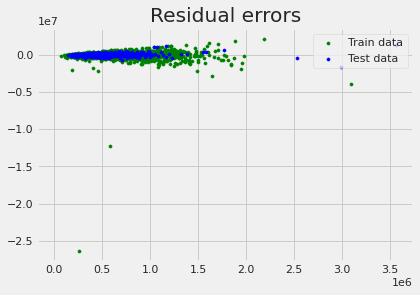

In [31]:
print('Coefficients: \n', regressionTwo.coef_)
print('Variance score on test data: {}'.format(regressionTwo.score(x_test, y_test)))
print('Variance score on training data: {}'.format(regressionTwo.score(x_train, y_train)))
plt.style.use('fivethirtyeight')
plt.scatter(regressionTwo.predict(x_train), regressionTwo.predict(x_train) - y_train,
   color = "green", s = 10, label = 'Train data')
plt.scatter(regressionTwo.predict(x_test), regressionTwo.predict(x_test) - y_test,
   color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 10)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [32]:
train1

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133
1,0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119
2,0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008
4,0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,98133
4596,0,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,98007
4597,0,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,98059
4598,0,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,98178


## Model training After Data Preprocessing

In [33]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
housingData['statezip']= label_encoder.fit_transform(housingData['statezip'])
  
housingData['statezip'].unique()

array([62, 58, 26,  7, 31, 54, 23, 27, 67, 48, 42, 49,  6, 45, 73,  5, 46,
        9, 60,  2, 63, 21, 17, 56, 22, 41, 13, 50, 68, 55, 14, 33, 44, 15,
       37, 43, 10, 38, 74, 32, 36, 59, 47, 53,  4, 57, 70,  3, 11, 64, 69,
        0, 34, 65, 16, 66, 35, 25,  8, 30, 19, 52, 18, 61, 20, 71, 75, 51,
       40, 72,  1, 24, 12, 39, 28, 29, 76])

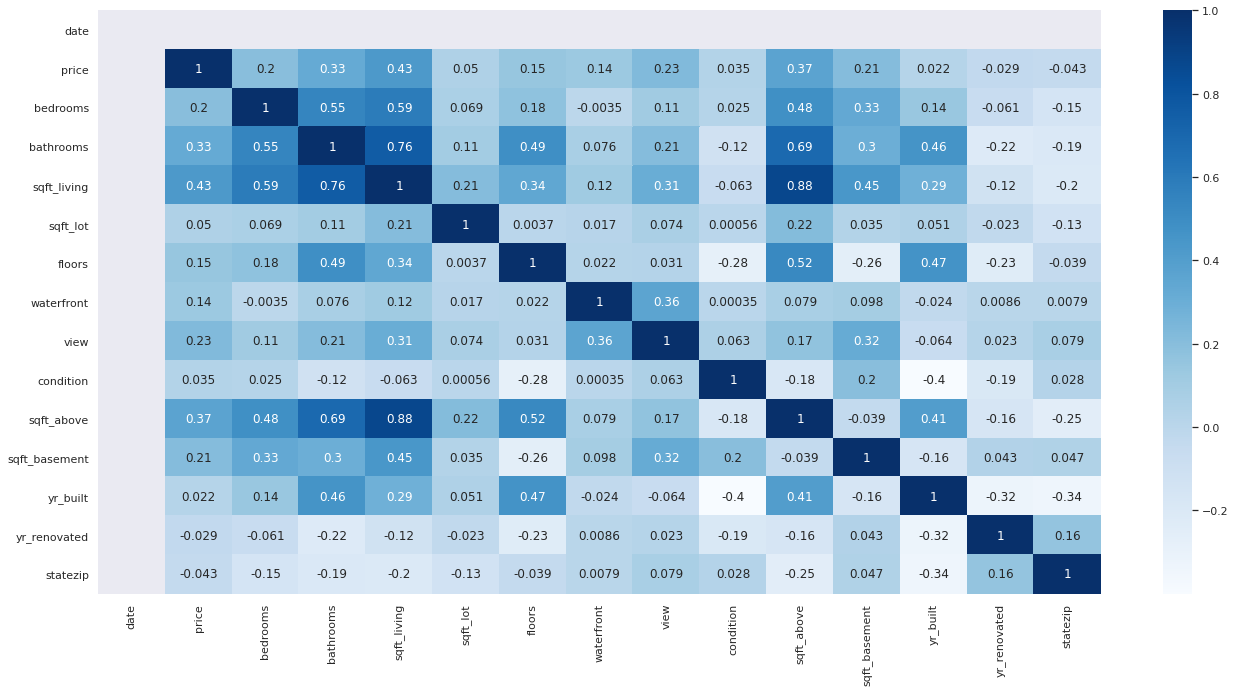

In [34]:
sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(housingData.corr(),annot=True,cmap='Blues')
plt.show()

In [35]:
target = housingData['price']
trainData = housingData[['bedrooms','bathrooms','sqft_living','sqft_above']]

print(target)
trainData.head()

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


,bedrooms,bathrooms,sqft_living,sqft_above
0,3.0,1.50,1340,1340
1,5.0,2.50,3650,3370
2,3.0,2.00,1930,1930
3,3.0,2.25,2000,1000
4,4.0,2.50,1940,1140


In [36]:
x_train , x_test , y_train , y_test = train_test_split(trainData , target , test_size = 0.10,random_state =2)

In [37]:
regressionThree = LinearRegression()

In [38]:
regressionThree.fit(x_train,y_train)

LinearRegression()

Coefficients: 
 [-5.93978756e+04  1.38353258e+04  3.10301878e+02 -3.65873314e+01]
Variance score on testing data: 0.5370620605231453
Variance score on training data: 0.17688119707414918


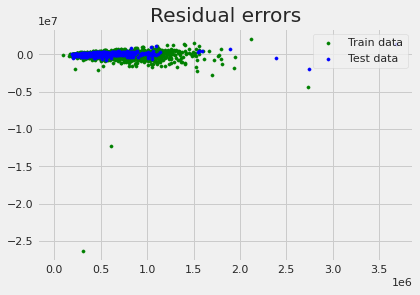

In [40]:
print('Coefficients: \n', regressionThree.coef_)
print('Variance score on testing data: {}'.format(regressionThree.score(x_test, y_test)))
print('Variance score on training data: {}'.format(regressionThree.score(x_train, y_train)))
plt.style.use('fivethirtyeight')
plt.scatter(regressionThree.predict(x_train), regressionThree.predict(x_train) - y_train,
   color = "green", s = 10, label = 'Train data')
plt.scatter(regressionThree.predict(x_test), regressionThree.predict(x_test) - y_test,
   color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 10)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [43]:
#Prediciting the values

y_pred = regressionThree.predict(x_test)  
x_pred = regressionThree.predict(x_train)

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 160225.8189052196
Mean Squared Error: 55949453730.25235
Root Mean Squared Error: 236536.3687263596
Variance score: 0.54
